# Bike 데이터 셋을 활용한 데이터 처리 및 시각화

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

In [10]:
train = pd.read_csv("bike/train.csv", parse_dates=['datetime'])
test = pd.read_csv("bike/test.csv", parse_dates=['datetime'])
sub = pd.read_csv("bike/sampleSubmission.csv", parse_dates=['datetime'])

train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [5]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [14]:
sub.columns

Index(['datetime', 'count'], dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [15]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  6493 non-null   datetime64[ns]
 1   count     6493 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 101.6 KB


01. datetime은 언제부터 언제까지의 데이터일까?

In [19]:
train['datetime'].min(), train['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [20]:
test['datetime'].min(), test['datetime'].max()

(Timestamp('2011-01-20 00:00:00'), Timestamp('2012-12-31 23:00:00'))

In [21]:
sub['datetime'].min(), sub['datetime'].max()

(Timestamp('2011-01-20 00:00:00'), Timestamp('2012-12-31 23:00:00'))

 * train은 1일 부터 19일 까지 test는 20일부터 31일 까지 데이터 

02-A count와 temp는 어떤 상관관계가 있을까?

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

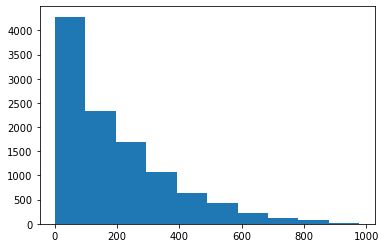

In [28]:
plt.hist(train['count'])

In [29]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x276faf89880>,
 'caps': [<matplotlib.lines.Line2D at 0x276faf89ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x276faf895b0>],
 'medians': [<matplotlib.lines.Line2D at 0x276fa744400>],
 'fliers': [<matplotlib.lines.Line2D at 0x276fa7446d0>],
 'means': []}

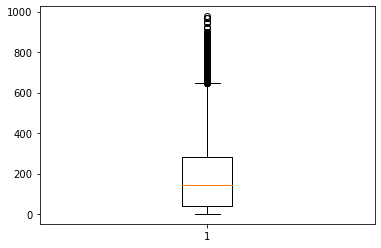

In [32]:
plt.boxplot(train['count'])

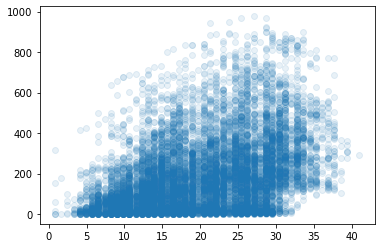

In [36]:
plt.plot(train['temp'], train['count'], 'o', alpha=0.1)

02-B corr()를 활용하여 count와 다른 feature(특징)간의 상관계수를 확인해 보자.

In [39]:
train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

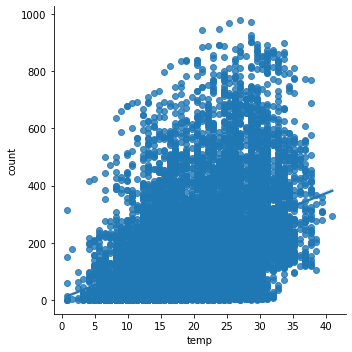

In [42]:
sns.lmplot(x = 'temp', y='count', data=train)

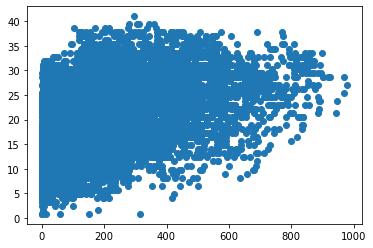

In [24]:
plt.scatter(train['count'], train['temp'])

C:\Users\GSENR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count', ylabel='temp'>

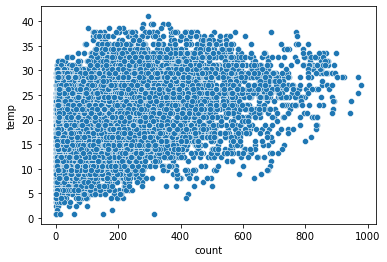

In [27]:
sns.scatterplot(train['count'], train['temp'])

In [22]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


03. 계절별 데이터를 확인 및 시각화 해 보자.

In [57]:
train['season'].unique()

array([1, 2, 3, 4], dtype=int64)

Text(0.5, 1.0, 'test dataset - seasons')

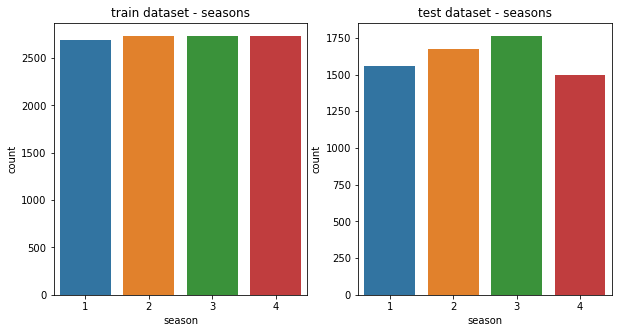

In [63]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'season', data=train)
plt.title('train dataset - seasons')

plt.subplot(1,2,2)
sns.countplot(x = 'season', data=test)
plt.title('test dataset - seasons')

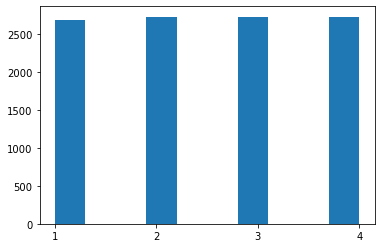

In [60]:
plt.hist(train['season'])
plt.xticks([1,2,3,4])
plt.show()

In [65]:
test['season'].value_counts()

3    1763
2    1676
1    1556
4    1498
Name: season, dtype: int64

04. 쉬는날과 아닌날의 데이터는 얼마나 될까? 이를 시각화하기

In [66]:
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<BarContainer object of 2 artists>

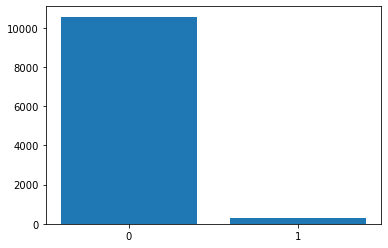

In [67]:
data = train['holiday'].value_counts()
plt.bar(data.index.astype(str), data.values)

05. weather는 어떤 값을 갖고, 각각의 데이터의 수는 얼마나 될까?(시각화하기)

In [68]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [70]:
test['weather'].value_counts()

1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64

<BarContainer object of 4 artists>

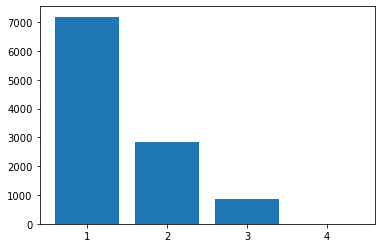

In [69]:
data = train['weather'].value_counts()
plt.bar(data.index.astype(str), data.values)

06. 아래의 값의 분포를 2행, 2열로 표시해 보자.

temp의 값의 분포는 어떠할까?  
atemp의 값의 분포는 어떠할까?  
humidity의 값의 분포는 어떠할까?  
windspeed의 값의 분포는 어떠할까?  
전체 그래프에 대한 제목을 달아보자(suptitle, 크기(size)=20)   
각각의 그래프에 대한 x축 레이블을 넣어보자(크기는 17)  

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

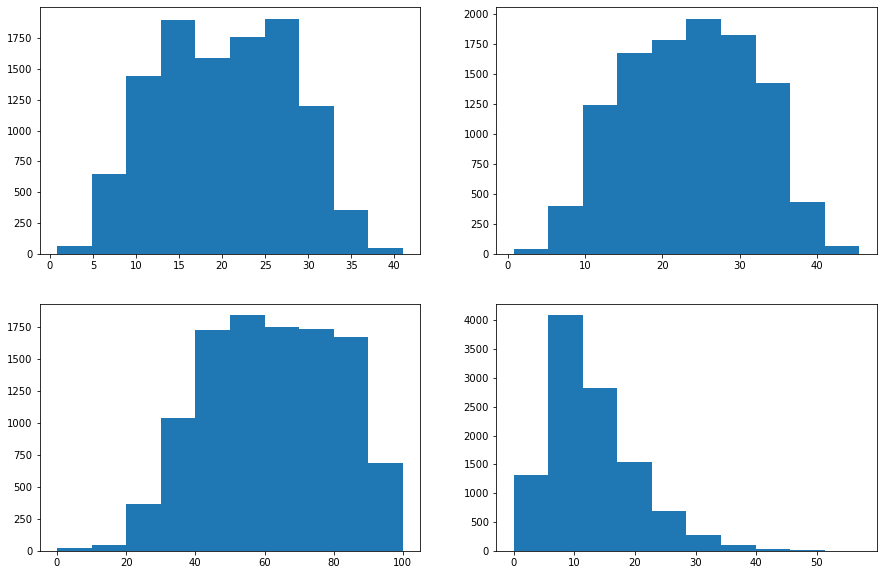

In [71]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(train.temp)

plt.subplot(2,2,2)
plt.hist(train.atemp)

plt.subplot(2,2,3)
plt.hist(train.humidity)

plt.subplot(2,2,4)
plt.hist(train.windspeed)

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

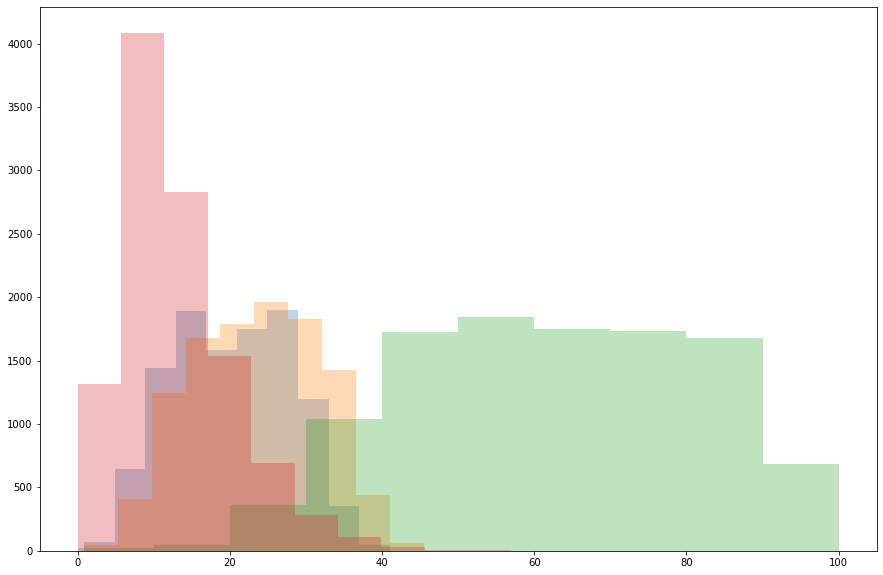

In [72]:
plt.figure(figsize=(15,10))
plt.hist(train.temp, alpha=0.3)
plt.hist(train.atemp, alpha=0.3)
plt.hist(train.humidity, alpha=0.3)
plt.hist(train.windspeed, alpha=0.3)

In [78]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import platform

In [79]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

Text(0.5, 0.98, '피처의 값의 분포')

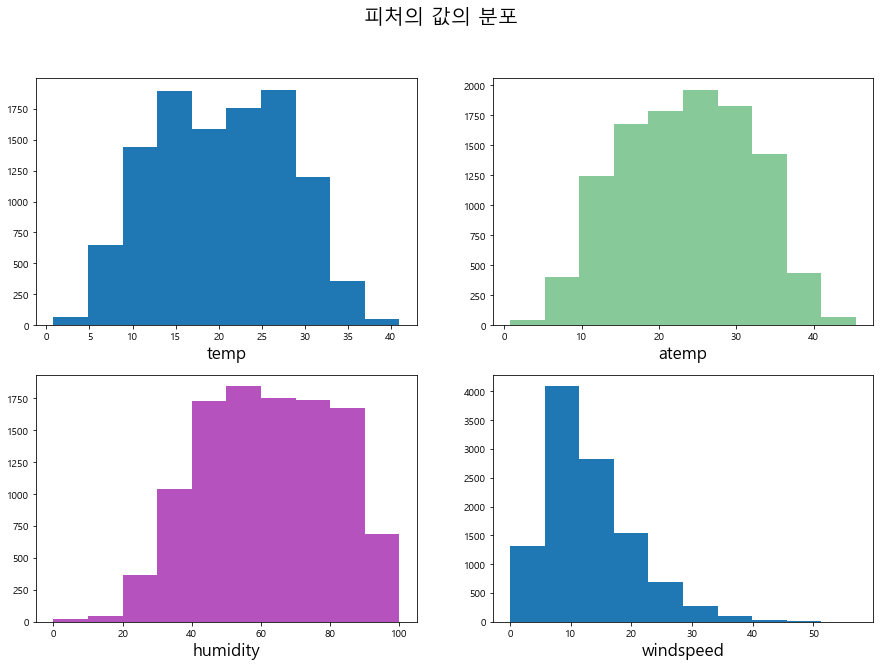

In [80]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(train.temp)
plt.xlabel("temp", size=17)

plt.subplot(2,2,2)
plt.hist(train.atemp, color="#88c999")
plt.xlabel("atemp", size=17)

plt.subplot(2,2,3)
plt.hist(train.humidity, color='#B652BE')
plt.xlabel("humidity", size=17)

plt.subplot(2,2,4)
plt.hist(train.windspeed)
plt.xlabel("windspeed", size=17)

plt.suptitle("피처의 값의 분포", size=20)

07. weather별 데이터의 비율은 어느정도 될까?

In [83]:
train['weather'].count()

10886

In [84]:
all_cnt = train['weather'].count()
print(train['weather'].value_counts()/ all_cnt)

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64


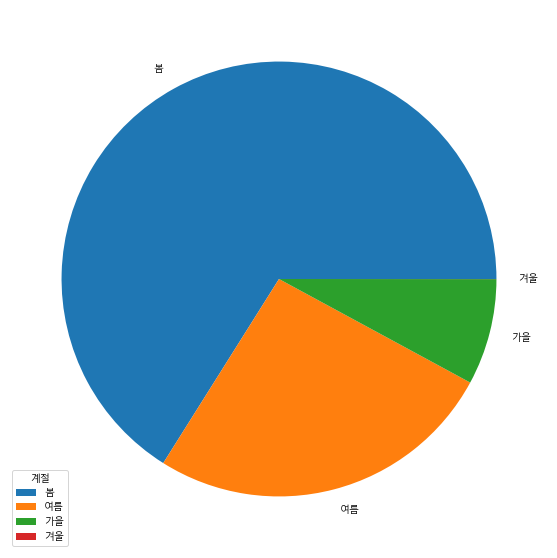

In [88]:
plt.figure(figsize=(10,10))
dat = train['weather'].value_counts()/ all_cnt
dat.index=['봄', '여름', '가을', '겨울']
plt.pie(dat.values, labels=dat.index)
plt.legend(title='계절')

### 기본 모델을 만들기 위해 피처 선택 등을 수행.

In [89]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [91]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [93]:
train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

In [97]:
## 데이터 나누기(입력, 출력)
## 모델 선택
## 모델 학습
## 모델 평가
## 최종 모델로 예측

sel = ['season', 'temp', 'weather', 'atemp', 'humidity']

X = train[sel]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = train.holiday, test_size=0.3,random_state=777)

In [99]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred[:10]

array([ 60.19979878, 199.81480783, 222.04685517, 284.03695325,
       102.00512668, 314.17529869, 254.97051549, 147.06744085,
       170.81657846, 157.16779095])

In [100]:
# 결정계수
print('학습용 데이터 셋 평가 : ', model.score(X_train, y_train))
print('테스트 데이터 셋 평가 : ', model.score(X_test, y_test))

학습용 데이터 셋 평가 :  0.2618516780511595
학습용 데이터 셋 평가 :  0.254814774642517


In [101]:
### MSE로 평가지표로 평가해 보기
np.sum((pred - y_test) ** 2) / len(pred)

24417.548232691486

In [124]:
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train,y_train)
pred = model.predict(X_test)
# 결정계수
print('학습용 데이터 셋 평가 : ', model.score(X_train, y_train))
print('테스트 데이터 셋 평가 : ', model.score(X_test, y_test))
### MSE로 평가지표로 평가해 보기
print('MSE : ', np.sum((pred - y_test) ** 2) / len(pred))
print('rmlse : ', np.sqrt(np.sum(((np.log(pred) - np.log(y_test))**2)) / len(pred)))

학습용 데이터 셋 평가 :  0.2808510586326226
테스트 데이터 셋 평가 :  0.27023632929744124
MSE :  23912.22882780251
rmlse :  1.4329188308721064


In [138]:
model = RandomForestRegressor(max_depth=4 ,n_estimators = 100)
model.fit(X_train,y_train)
pred = model.predict(X_test)
# 결정계수
print('학습용 데이터 셋 평가 : ', model.score(X_train, y_train))
print('테스트 데이터 셋 평가 : ', model.score(X_test, y_test))
### MSE로 평가지표로 평가해 보기
print('MSE : ', np.sum((pred - y_test) ** 2) / len(pred))
print('rmlse : ', np.sqrt(np.sum(((np.log(pred) - np.log(y_test))**2)) / len(pred)))

학습용 데이터 셋 평가 :  0.2966572383883346
테스트 데이터 셋 평가 :  0.2823471984618391
MSE :  23515.39093851178
rmlse :  1.4325315820631146


In [117]:
# rmlse
np.sqrt(np.sum(((np.log(pred) - np.log(y_test))**2)) / len(pred))

1.4329188308721064

 * 3개의 모델의 비교 결과 앙상블 모델(RandomForestRegressor)이 가장 좋다.

### 최종 모델

In [140]:
test_last = test[sel]

In [143]:
model = RandomForestRegressor(max_depth=4 ,n_estimators = 100)
model.fit(X_train,y_train)
pred = model.predict(test_last)
# 결정계수
print('학습용 데이터 셋 평가 : ', model.score(X_train, y_train))
print('테스트 데이터 셋 평가 : ', model.score(X_test, y_test))

학습용 데이터 셋 평가 :  0.2950367700948464
테스트 데이터 셋 평가 :  0.2813979385409514


In [148]:
sub['count'] = pred
sub.loc[sub['count'] < 0, 'count'] = 0 # 음수 처리
sub.to_csv('baseline_model.csv', index=False)